In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Wholesale customers data.csv')

In [6]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [8]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [20]:
df = pd.get_dummies(df,drop_first = True)

In [22]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
scaled_data = scaler.fit_transform(df)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

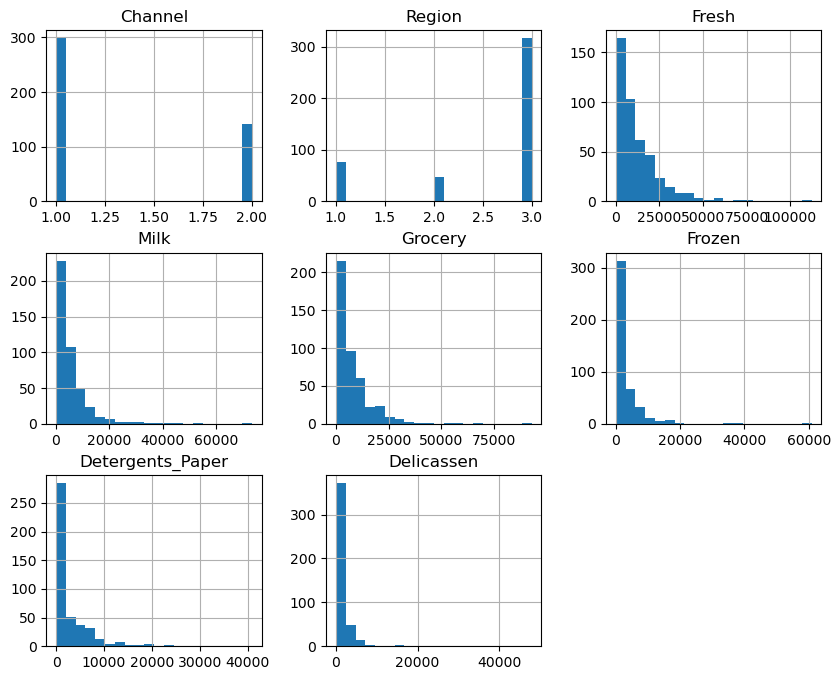

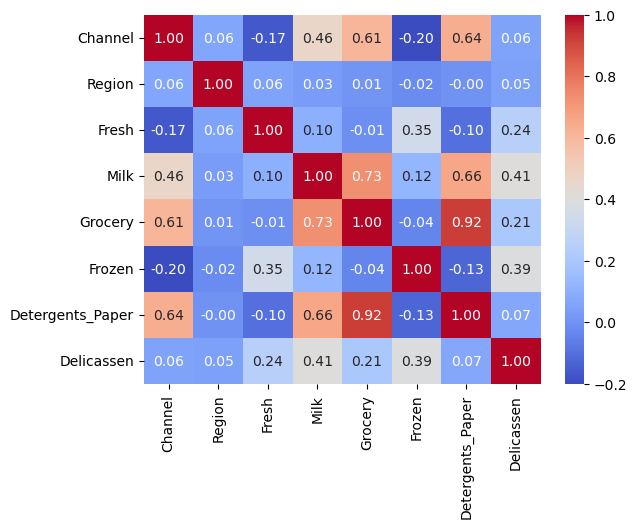

In [32]:
data.hist(bins=20,figsize=(10,8))
plt.show()


sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')
plt.show()

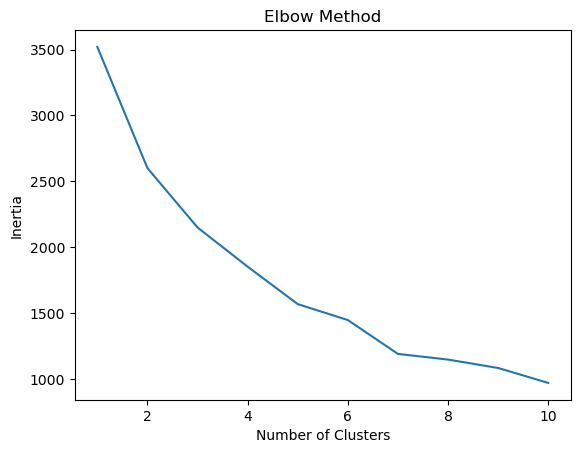

In [36]:
from sklearn.cluster import KMeans


inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [40]:
kmeans = KMeans(n_clusters= 3,random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster']=clusters

In [42]:
from sklearn.cluster import DBSCAN


In [44]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_clusters= dbscan.fit_predict(scaled_data)

data['DBSCAN CLUSTERS']= dbscan_clusters

In [46]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.3567685389017652


In [48]:
# Count the number of noise points
noise_points = sum(dbscan_clusters == -1)
print(f"Number of Noise Points: {noise_points}")


Number of Noise Points: 255


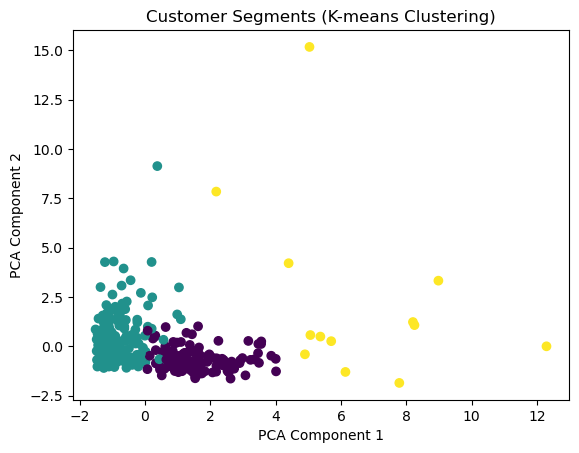

In [50]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the PCA components with clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments (K-means Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


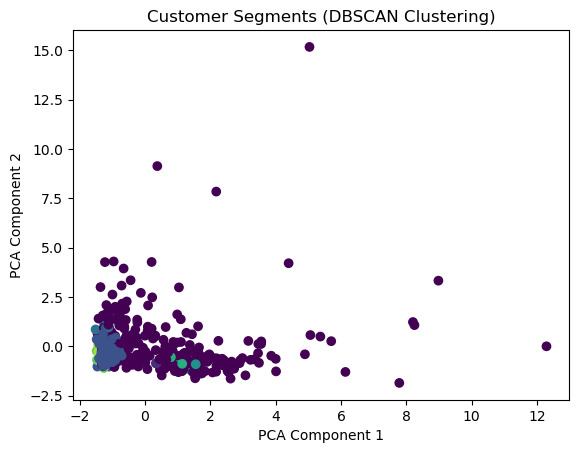

In [52]:
# Plot the PCA components with DBSCAN clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title("Customer Segments (DBSCAN Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [54]:
# Calculate mean of each feature for each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1        1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2        1.846154  2.615385  25770.769231  35160.384615  41977.384615   

              Frozen  Detergents_Paper   Delicassen  DBSCAN CLUSTERS  
Cluster                                                               
0        1441.630769       5991.146154  1535.007692        -0.538462  
1        3620.400673        776.875421  1242.249158         0.646465  
2        6844.538462      19867.384615  7880.307692        -1.000000  


In [64]:
# Calculate mean of each feature for each DBSCAN cluster
dbscan_summary = data.groupby('DBSCAN CLUSTERS').mean()
print(dbscan_summary)


                  Channel   Region         Fresh          Milk       Grocery  \
DBSCAN CLUSTERS                                                                
-1               1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0               2.000000  3.00000  11401.000000   3536.200000   6729.000000   
 1               1.000000  3.00000   9128.823077   1862.438462   2423.530769   
 2               1.000000  3.00000  41446.600000   1421.200000   2167.600000   
 3               2.000000  3.00000   2357.200000  10224.800000  11862.800000   
 4               2.000000  3.00000   3068.142857   6095.857143  10355.000000   
 5               1.000000  1.00000   9837.863636   1751.863636   2161.681818   
 6               1.000000  1.00000   6823.000000   1943.000000   2372.666667   
 7               1.000000  2.00000   7494.600000   1537.600000   3383.000000   

                      Frozen  Detergents_Paper   Delicassen   Cluster  
DBSCAN CLUSTERS                                